In [ ]:
! pip install swifter
! pip install pandas
! pip install textacy
! pip install spacy

In [ ]:
! python -m spacy download en_core_web_sm

In [ ]:
from os import listdir
from os.path import isfile, join
import spacy
import pandas as pd
from tqdm.auto import tqdm 
import swifter
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from spacy import displacy
from collections import Counter
import textacy
# import textacy

pd.options.plotting.backend = "plotly"


def loadData(path: str) -> list():
    onlyfiles = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
    data_frames = []
    for i, el in enumerate(onlyfiles):
      df = pd.read_csv(el)
      data_frames.append(df)
    return data_frames

def prepare(df):
  df['Text'] = df['Text'].swifter.apply(lambda x: x.lower())
  df['Text'] = df['Text'].swifter.apply(lambda x: x.replace('@', ''))
  df['Text_en'] = df['Text'].swifter.apply(en)
  df['Token'] = df['Text_en'].swifter.apply(lambda x: [token.lemma_ for token in x if not token.is_stop if not token.is_punct])
  df['2_grams'] = df['Text_en'].swifter.apply(lambda x: list(textacy.extract.basics.ngrams(x, 2, min_freq=1)))
  df['3_grams'] = df['Text_en'].swifter.apply(lambda x: list(textacy.extract.basics.ngrams(x, 3, min_freq=1)))
  return df

def word_cloud(df, token, grams, no_word, n=30, m= 30 ):

  word_counts1 = dict(Counter(df[token].sum()).most_common(n))
  word_counts2 = dict(Counter(df[grams].sum()))
  word_counts2 = {str(k): v for k,v in word_counts2.items()}

  for el in word_counts2.keys():
    for word in el.split(' '):
      if word in word_counts1 and word not in no_word:
        word_counts2[el] += word_counts1[word]
  word_counts2 = dict(Counter(word_counts2).most_common(m))
  wc = WordCloud(width=800, height=400)
  wc.generate_from_frequencies(frequencies=word_counts2)
  plt.figure(figsize=(10,8))
  plt.imshow(wc)

In [ ]:
en = spacy.load("en_core_web_sm") # loading spacy model

In [ ]:
#en.Defaults.stop_words |= {"@.*",}

# NETFLIX

Jedną z sankcji nałożoną na Rosję jest zawieszenie platformy Netflix. Na podstawie tego zbioru przeanalizowaliśmy pewne cechy tweetow. Zrobiliśmy standardowe processing zbioru do tokenów i usuwaniu stop wordów. Dokonakliśmy też przekształceń do małych liter oraz usuniecię zbędnych znaków. Następnie badaliśmy częstość występowania słów. Ze względów na sposób zbierania zbioru stop wordem będzię również słowo po kórym był szukne tweety.

Natomiast bardziej interesujace powinny być n-gramy słów. Niestety okazało sie, ze przy 10k tweetach nie ma wcale, albo jest bardzo mało powórzeń. Dlatego prezentacja dla 2, 3 gramów bazuje na wyborze tych n-gramów, które składają się z naczęściej wystepujących słów

In [ ]:
df_netflix = pd.read_csv('/content/drive/MyDrive/data/data/netflix_ban_10k.csv')

In [ ]:
df_netflix = prepare(df_netflix)

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

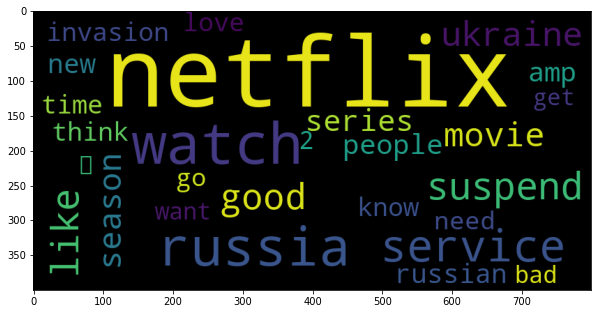

In [ ]:
word_counts1 = dict(Counter(df_netflix['Token'].sum()).most_common(30))
wc = WordCloud(width=800, height=400)
wc.generate_from_frequencies(frequencies=word_counts1)
plt.figure(figsize=(10,8))
plt.imshow(wc)

Tak to wygląda gdy bezmyslnie dajemy worldcloud, gdzie wystepowanie kazdego 3- gramu występuje raz. Stąd nie widać tutaj jakiś konretnych rzeczy, a bardziej losowe rzeczy związane z Netflixem.

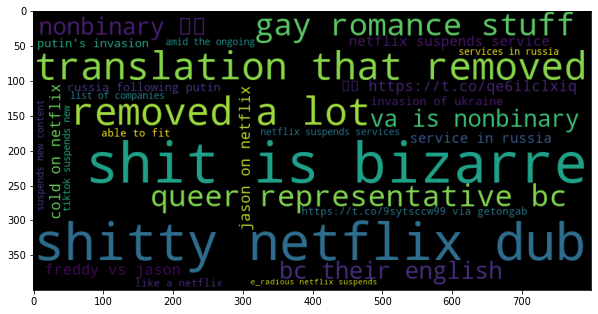

In [ ]:
word_counts1 = dict(Counter(df_netflix['3_grams'].sum()).most_common(30))
word_counts1 = {str(k): v for k,v in word_counts1.items()}
wc = WordCloud(width=800, height=400)
wc.generate_from_frequencies(frequencies=word_counts1)
plt.figure(figsize=(10,8))
plt.imshow(wc)

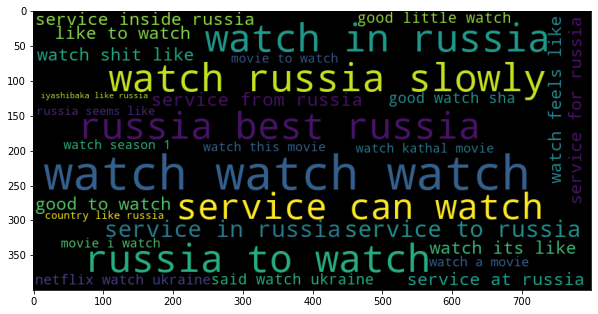

In [ ]:
word_cloud(df_netflix, 'Token', '3_grams', ['netflix'])

W zbiorze danych mamy też informacje o likeach pod tweetami.

In [ ]:
def sort_likes(df):
  return df.sort_values('Likes Count', ascending = False)

Tutaj rozkład posortowanych po liczbie lików

In [ ]:
px.histogram(sort_likes(df_netflix).head(500)['Likes Count'], log_y=True)

Widzimy, że są dwa tweety, które maja widocznie większa liczbę likow. Analiza tych top tweetow, żeby zobaczyć jak teamt snakcji Netflixa był poruszony na Twitterze, czy jedank sprawy bierzące związne z serialami i filmami były istotniejsze.

In [ ]:
top_tweets = sort_likes(df_netflix).head(2).Text_en
displacy.render(top_tweets.iloc[0], style='ent',jupyter=True)
print()
displacy.render(top_tweets.iloc[1], style='ent',jupyter=True)

Widzimy, ze tak naprawdę jest zarówno o tym jak  i o drugim, chociaż tweet o tym, ze nie widomo co obejrzeć cieszy się wikszym zainteresowaniem 

W związku z tym, że mamy dostęp do tego to możemy też zobaczyć jakie tweety uzyskały najwięcej lików. Wybralismy top 500 tweetów i chcieliśmy zobaczyć w jak w tej weższej grypie tweetów wygląda zbiór najczęstszych słów.

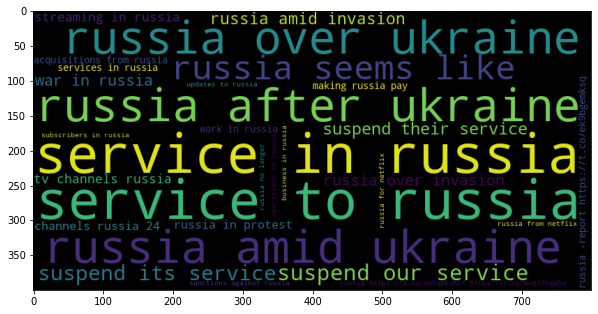

In [ ]:
word_cloud(sort_likes(df_netflix).head(500), 'Token', '3_grams', ['netflix'])

# MC Donalds

In [ ]:
df_mcdonalds = pd.read_csv('/content/drive/MyDrive/data/data/mcdonalds_ban_10k.csv')

In [ ]:
df_mcdonalds = prepare(df_mcdonalds)

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

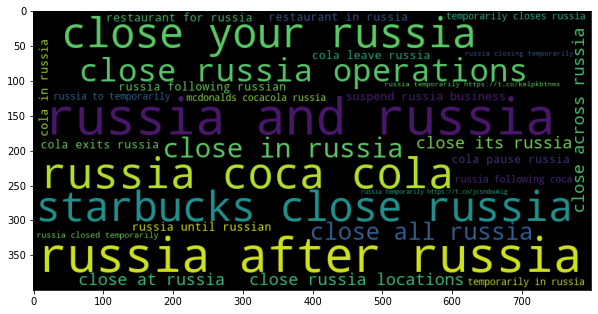

In [ ]:
word_cloud(df_mcdonalds, 'Token', '3_grams', ['mcdonald'])

In [ ]:
px.histogram(sort_likes(df_mcdonalds).head(500)['Likes Count'], log_y=True)

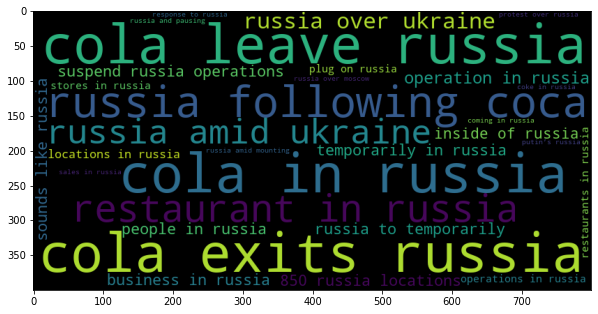

In [ ]:
word_cloud(sort_likes(df_mcdonalds).head(500), 'Token', '3_grams', ['mcdonald'])

In [ ]:
top_tweets = sort_likes(df_mcdonalds).head(2).Text_en
displacy.render(top_tweets.iloc[0], style='ent',jupyter=True)
print()
displacy.render(top_tweets.iloc[1], style='ent',jupyter=True)

# SWIFT

In [ ]:
df_swift = pd.read_csv('/content/drive/MyDrive/data/data/swift_ban_50k.csv')

In [ ]:
df_swift = prepare(df_swift)

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

W tym przypadku ze wzgledu na to ze oprocz systemu SWIFT mamy rownież klub piłkarski oraz Tylor Swift. To powodowało, że wiele tweetow byly o róznej tematyce. Mozemy się jadnak ich pozbyć, Wówczas mamy

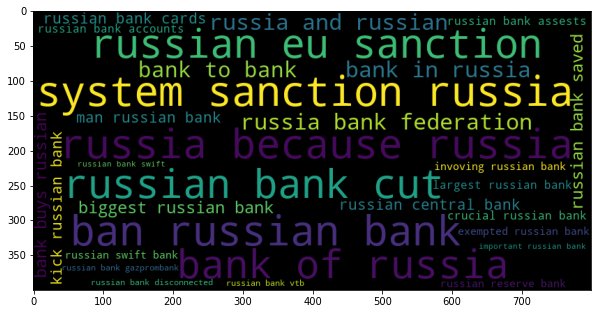

In [ ]:
word_cloud(df_swift, 'Token', '3_grams', ['taylor', 'swift'])

A tak to wygląda gdy Tylo Swift pozostaje w zbiorze

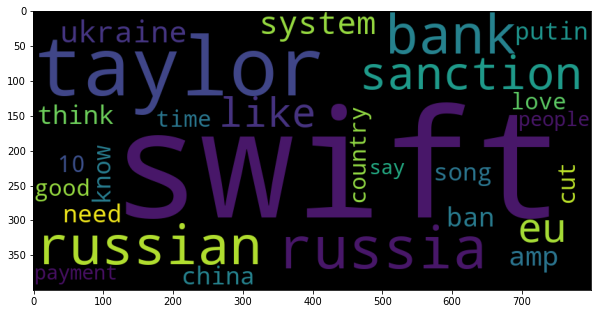

In [ ]:
word_counts1 = dict(Counter(df_swift['Token'].sum()).most_common(30))
wc = WordCloud(width=800, height=400)
wc.generate_from_frequencies(frequencies=word_counts1)
plt.figure(figsize=(10,8))
plt.imshow(wc)

In [ ]:
px.histogram(sort_likes(df_swift).head(500)['Likes Count'], log_y=True)

W tym przypadku weźmy trochę wiecej tweetów

In [ ]:
top_tweets = sort_likes(df_swift).head(5).Text_en
for i in range(len(top_tweets)):
  displacy.render(top_tweets.iloc[i], style='ent',jupyter=True)
  print()

Widzimy, ze niestyety popularność Tylor Swift przyćmiła teamt SWIFTU w tweetac, a przy najmniej w dniu sankcji. Musimy się więc pozbyć ich, ponieważ nie są one związne z pracą badawczą jaka